In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_excel("/Users/shreyamishra/Desktop/CMO-Historical-Data-Monthly.xlsx")
print(df.dtypes)

Unnamed: 0      object
CRUDE_PETRO    float64
CRUDE_BRENT    float64
CRUDE_DUBAI    float64
CRUDE_WTI       object
                ...   
NICKEL         float64
Zinc           float64
GOLD           float64
PLATINUM       float64
SILVER         float64
Length: 72, dtype: object


In [5]:
df.head()

,Unnamed: 0,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [6]:
# Rename the first unnamed column to 'Date'
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

In [7]:
# Convert the 'Date' column to date format
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%YM%m')

In [8]:
df.set_index("Date", inplace=True)

In [9]:
df.head()

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
Date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


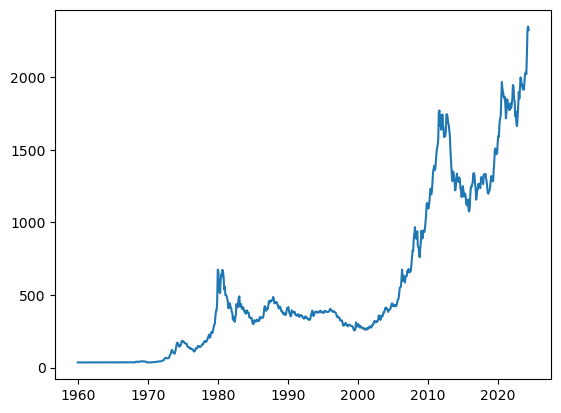

In [10]:
plt.plot(df['GOLD'])

In [11]:
df.columns

Index(['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'COAL_AUS',
       'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COCOA',
       'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dtype='object')

In [12]:
df1 = df[['GOLD']]

In [13]:
df1.head()

,GOLD
Date,
1960-01-01,35.27
1960-02-01,35.27
1960-03-01,35.27
1960-04-01,35.27
1960-05-01,35.27


In [14]:
df2 = df1.values
df2 = df2.astype('float32')

In [15]:
##LSTM uses sigmoid and tanh functions that are sensitive to magnitude
##normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) 
dataset = scaler.fit_transform(df2)

In [16]:
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
len(train),len(test)

(541, 233)

In [17]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [18]:
seq_size = 5
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
print('Single LSTM with hidden Dense...')
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
# Add Input layer to define the input shape
model.add(Input(shape=(None, seq_size)))
# Add the LSTM layer
model.add(LSTM(64))
# Add Dense layers
model.add(Dense(32))
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
# Print the model summary
model.summary()

Single LSTM with hidden Dense...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=2, epochs=100)

Epoch 1/100
17/17 - 2s - 128ms/step - loss: 0.0055 - val_loss: 0.0782
Epoch 2/100
17/17 - 0s - 6ms/step - loss: 0.0019 - val_loss: 0.0515
Epoch 3/100
17/17 - 0s - 6ms/step - loss: 5.8513e-04 - val_loss: 0.0021
Epoch 4/100
17/17 - 0s - 5ms/step - loss: 1.5247e-04 - val_loss: 0.0039
Epoch 5/100
17/17 - 0s - 5ms/step - loss: 1.4594e-04 - val_loss: 0.0023
Epoch 6/100
17/17 - 0s - 5ms/step - loss: 1.3722e-04 - val_loss: 0.0014
Epoch 7/100
17/17 - 0s - 7ms/step - loss: 1.3190e-04 - val_loss: 0.0014
Epoch 8/100
17/17 - 0s - 7ms/step - loss: 1.2596e-04 - val_loss: 0.0018
Epoch 9/100
17/17 - 0s - 6ms/step - loss: 1.3067e-04 - val_loss: 0.0014
Epoch 10/100
17/17 - 0s - 7ms/step - loss: 1.3127e-04 - val_loss: 0.0013
Epoch 11/100
17/17 - 0s - 8ms/step - loss: 1.2560e-04 - val_loss: 0.0012
Epoch 12/100
17/17 - 0s - 6ms/step - loss: 1.2580e-04 - val_loss: 0.0012
Epoch 13/100
17/17 - 0s - 6ms/step - loss: 1.1903e-04 - val_loss: 0.0012
Epoch 14/100
17/17 - 0s - 6ms/step - loss: 1.1588e-04 - val_loss: 

In [22]:
###Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [23]:
###Do inverse
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [24]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.28 RMSE
Test Score: 219.62 RMSE


In [25]:
####MAE
from sklearn.metrics import mean_absolute_error as mae
MAE_Train=mae(trainY[0], trainPredict[:,0])
MAE_Test=mae(testY[0], testPredict[:,0])
MAE_Train 
MAE_Test

###MAPE
from sklearn.metrics import mean_absolute_percentage_error as mape
MAPE_Train=mape(trainY[0], trainPredict[:,0])
MAPE_Train
MAPE_Test=mape(testY[0], testPredict[:,0])
MAPE_Test

0.12702115578761183

In [26]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

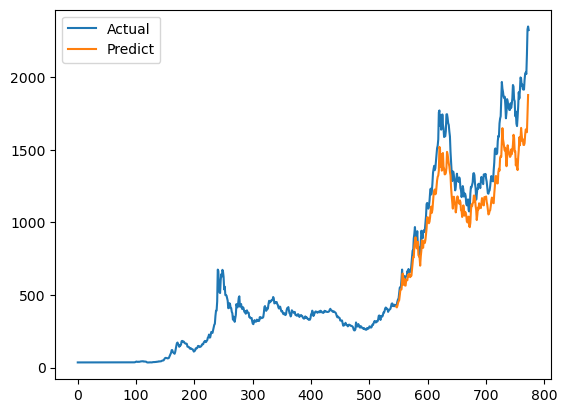

In [27]:
##Plot baseline and predictions
f_data= scaler.inverse_transform(dataset)
train = trainPredictPlot
test = testPredictPlot

# plot baseline and predictions
plt.plot(f_data, label="Actual")
plt.plot(test, label="Predict")
plt.legend()
plt.show()

In [28]:
actual_data = pd.DataFrame(f_data)
test_data = pd.DataFrame(testPredictPlot)
df = pd.DataFrame()
df['actual'] = actual_data
df['test'] = test_data
import os
os.getcwd()
df.to_csv("lstm10.csv")

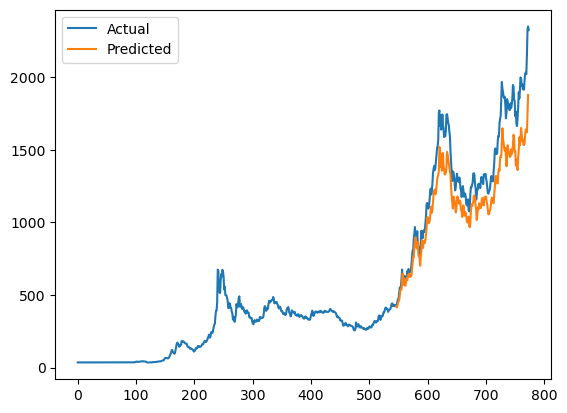

In [29]:
plt.plot(f_data, label="Actual")
plt.plot(test, label="Predicted")
plt.legend()
plt.show()